* 앙상블 메쏘드는 새로운 것을 배우는 것이 아니다. 새로운 분류가 아니다. 지금까지 핵심을 다 배웠다.
* Logistic이 제일 기본이다. discriminative 방법
* 문서 정보는 Naive Bayesian.
* SVM
* 여러가지 다 섞여 있으면 Decision tree이다.
* 여기에 양념으로 들어간 것이 PCA이다.
* variable을 차원을 줄이는 방식으로. Ensemble은 안정적인 방향으로 추구
* 앞서 4가지는 shallow learning이다. Linear한 모델들이다. 에러펑션을 줄여서 최저점인 w를 찾는 것이다. 에러펑션이 2차원 곡선이다. 최적화를 하는 과정이 쉽다. 그래서 w를 찾는 것이 그렇게 어렵지가 않다. fit이나 estimation이라고 불렀다. 감마를 자동으로 찾아주는 것이 아니다. 내가 지정해줘야 한다.
* 뉴럴네트워크는 딥러닝이라고 부른다. 목적함수가 깨끗하지가 않다. 꾸불꾸불한 곡선 형태다. 수렴도 잘 안된다. 최적화가 잘 안 돼서 예전에는 잘 안됐으나 이제는 잘 되는 편이라 조금 쓴다.

* http://scikit-learn.org/stable/_static/ml_map.png

# 모형 결합

모형 결합(model combining) 방법은 앙상블 방법론(ensemble methods)이라고도 한다. 이는 특정한 하나의 예측 방법이 아니라 복수의 예측 모형을 결합하여 더 나은 성능의 예측을 하려는 시도이다. 

모형 결합 방법을 사용하면 일반적으로 계산량은 증가하지만 다음과 같은 효과가 있다.

* 단일 모형을 사용할 때 보다 성능 분산이 감소하고(잘 안 흔들린다는 점)
* 과최적화를 방지한다.

(여기서 예측한다는 것은 y. 새로운 데이터가 들어왔을 때 어느 클래스에 속하는 지, 어느 영역에 속하는지를 예측한다는 것이다. 파라미터는 정해주고 시작하는 것이다. 파라미터를 정해야 하는데 너무 힘들다. 다른 거 10개나 100개 돌려봐서 정하자.)

모형 결합 방법은 크게 나누어 평균(averaging, aggregation) 방법론과 부스팅(boosting) 방법론으로 나눌 수 있다.

* 평균 방법론은 사용할 모형의 집합이 이미 결정되어 있지만
* 부스팅 방법론은 사용할 모형을 점진적으로 늘려간다.

각 방법론의 대표적인 방법들은 아래와 같다.

* 평균 방법론(평균 방법론 같은 경우에는 어떤 방식들을 합쳐도 상관이 없다.)
 * 다수결 (Majority Voting)
 * 배깅 (Bagging)
 * 랜덤 포레스트 (Random Forests)


* 부스팅 방법론
 * 에이다부스트 (AdaBoost)
 * 경사 부스트 (Gradient Boost)

## 다수결 방법

다수결 방법은 가장 단순한 모형 결합 방법으로 전혀 다른 모형도 결합할 수 있다. 다수결 방법은 Hard Voting 과 Soft Voting 두 가지로 나뉘어진다. 

* hard voting: 단순 투표. 개별 모형의 결과 기준. 예를 들어 투표방식
* soft voting: 가중치 투표. 개별 모형의 조건부 확률의 합 기준 or decision function을 기준으로 보겠다. 예를 들어 심사위원은 10표의 가치
 


Scikit-Learn 의 ensemble 서브패키지는 다수결 방법을 위한 [`VotingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) 클래스를 제공한다.


`sklearn.ensemble.VotingClassifier(estimators, voting='hard', weights=None)`

* 입력 인수:	
 * `estimators` : 
    * 개별 모형 목록, 리스트나 named parameter 형식으로 입력
 * `voting` : 문자열 {‘hard’, ‘soft’} (디폴트 ’hard’)
    * hard voting 과 soft voting 선택
 * `weights` : 리스트
    * 사용자 가중치



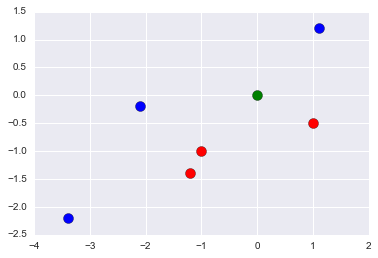

In [1]:
X = np.array([[-1.0, -1.0], [-1.2, -1.4], [1, -0.5], [-3.4, -2.2], [1.1, 1.2], [-2.1, -0.2]])
y = np.array([1, 1, 1, 2, 2, 2])
x_new = [0, 0]
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='r')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='b')
plt.scatter(x_new[0], x_new[1], s=100, c='g')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

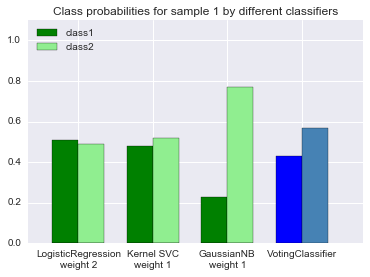

In [3]:
clf1 = LogisticRegression(random_state=1)
clf2 = SVC(random_state=1, probability=True)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('ksvc', clf2), ('gnb', clf3)], voting='soft', weights=[2, 1, 1])

probas = [c.fit(X, y).predict_proba([x_new]) for c in (clf1, clf2, clf3, eclf)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width=0.35 #bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, align='center', color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, align='center', color='lightgreen')
p3 = plt.bar(ind, [0,0,0,class1_1[-1]], width, align='center', color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, align='center', color='steelblue')

plt.xticks(ind + 0.5 * width, ['LogisticRegression\nweight 2',
                               'Kernel SVC\nweight 1',
                               'GaussianNB\nweight 1',
                               'VotingClassifier'])
plt.ylim([0, 1.1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class1', 'class2'], loc='upper left')
plt.show()

In [4]:
from itertools import product

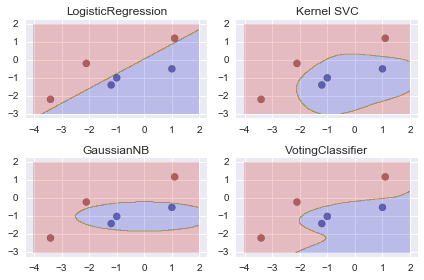

In [6]:
x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.025), np.arange(y_min, y_max, 0.025))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['LogisticRegression', 'Kernel SVC', 'GaussianNB', 'VotingClassifier']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()
plt.show()

In [7]:
from itertools import product
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

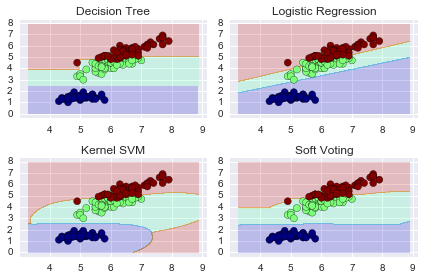

In [9]:
iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=4).fit(X, y)
model2 = LogisticRegression().fit(X, y)
model3 = SVC(probability=True).fit(X, y)
model4 = VotingClassifier(estimators=[('dt', model1), ('lr', model2), ('svc', model3)],
                          voting='soft', weights=[1, 2, 3]).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.025), np.arange(y_min, y_max, 0.025))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, model4],
                        ['Decision Tree', 'Logistic Regression', 'Kernel SVM', 'Soft Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()    
plt.show()

다수결 모형이 개별 모형보다 더 나은 성능을 보이는 이유는 다음 실험에서도 확인 할 수 있다.

만약 어떤 개별 모형이 오차를 출력할 확률이 $p$인 경우에 이러한 모형을 $N$ 개 모아서 다수결 모형을 만들면 오차를 출력할 확률이 다음과 같아진다.


$$ \sum_{k>\frac{N}{2}}^N \binom N k p^k (1-p)^{N-k} $$ 

In [24]:
sp.misc.comb(10, 2)

45.0

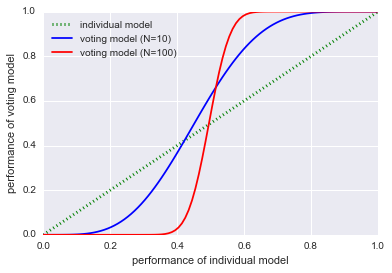

In [25]:
def total_error(p, N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N + 1):
        te += sp.misc.comb(N, k) * p**k * (1-p)**(N-k)
    return te

x = np.linspace(0, 1, 100)
plt.plot(x, x, 'g:', lw=3, label="individual model")
plt.plot(x, total_error(x, 10), 'b-', label="voting model (N=10)")
plt.plot(x, total_error(x, 100), 'r-', label="voting model (N=100)")
plt.xlabel("performance of individual model")
plt.ylabel("performance of voting model")
plt.legend(loc=0)
plt.show()

## 배깅

배깅(bagging)은 동일한 모형과 모형 모수를 사용하는 대신 부트스트래핑(bootstrapping)과 유사하게 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용한다.

트레이닝 데이터를 선택하는 방법에 따라 다음과 같이 부르기도 한다.

* 같은 데이터 샘플을 중복사용(replacement)하지 않으면: Pasting
* 같은 데이터 샘플을 중복사용(replacement)하면 Bagging. (공 다시 집어넣고 꺼내는 경우)
* 데이터가 아니라 다차원 독립 변수 중 일부 차원을 선택하는 경우에는: Random Subspaces
* 데이터 샘플과 독립 변수 차원 모두 일부만 랜덤하게 사용하면: Random Patches  (랜덤 조각째로 쓰는 것)

성능 평가시에는 트레이닝용으로 선택한 데이터가 아닌 다른 데이터를 사용할 수도 있다. 이런 데이터를 OOB(out-of-bag) 데이터라고 한다.

Scikit-Learn 의  ensemble 서브패키지는 배깅 모형 결합을 위한 [`BaggingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 클래스를 제공한다. 사용법은 다음과 같다.



`sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)`


* 인수:	
 * `base_estimator`: 
   * 기본 모형
 * `n_estimators`: 정수. 디폴트 10
   * 모형 갯수
 * `max_samples`: 정수 혹은 실수. 디폴트 1.0
   * 데이터 샘플 중 선택할 샘플의 수 혹은 비율
 * `max_features`: 정수 혹은 실수. 디폴트 1.0
   * 다차원 독립 변수 중 선택할 차원의 수 혹은 비율
 * `bootstrap`: 불리언, 디폴트 True
   * 데이터 중복 사용 여부
 * `bootstrap_features`: 불리언, 디폴트 False
   * 차원 중복 사용 여부
 * `oob_score`: 불리언 디폴트 False
   * 성능 평가시 OOB(out-of-bag) 샘플 사용 여부

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

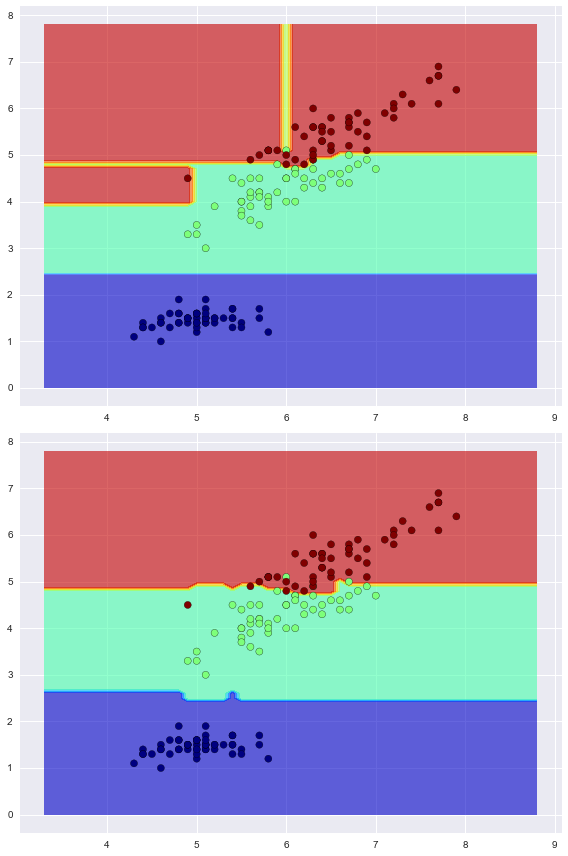

In [27]:
iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier().fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features=True, random_state=0).fit(X, y)  #특이현상이 사라지네

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(8,12))

plt.subplot(211)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)

plt.subplot(212)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)

plt.tight_layout()
plt.show()

## 랜덤 포레스트

배깅 방식을 특화시켰다. 의사결정나무 방식만 쓰는 것이다.

랜덤 포레스트(Random Forest)는 의사 결정 나무(Decision Tree)를 개별 모형으로 사용하는 모형 결합 방법을 말한다.

배깅과 마찬가지로 데이터 샘플의 일부만 선택하여 사용한다. 하지만 노드 분리시 모든 독립 변수들을 비교하여 최선의 독립 변수를 선택하는 것이 아니라 독립 변수 차원을 랜덤하게 감소시킨 다음 그 중에서 독립 변수를 선택한다. 이렇게 하면 개별 모형들 사이의 상관관계가 줄어들기 때문에 모형 성능의 변동이 감소하는 효과가 있다.

이러한 방법을 극단적으로 적용한 것이 Extremely Randomized Trees 모형으로 이 경우에는 각 노드에서 랜덤하게 독립 변수를 선택한다.

랜덤 포레스트와 Extremely Randomized Trees 모형은 각각 `RandomForestClassifier`클래스와 `ExtraTreesClassifier` 클래스로 구현되어 있다.

In [28]:
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

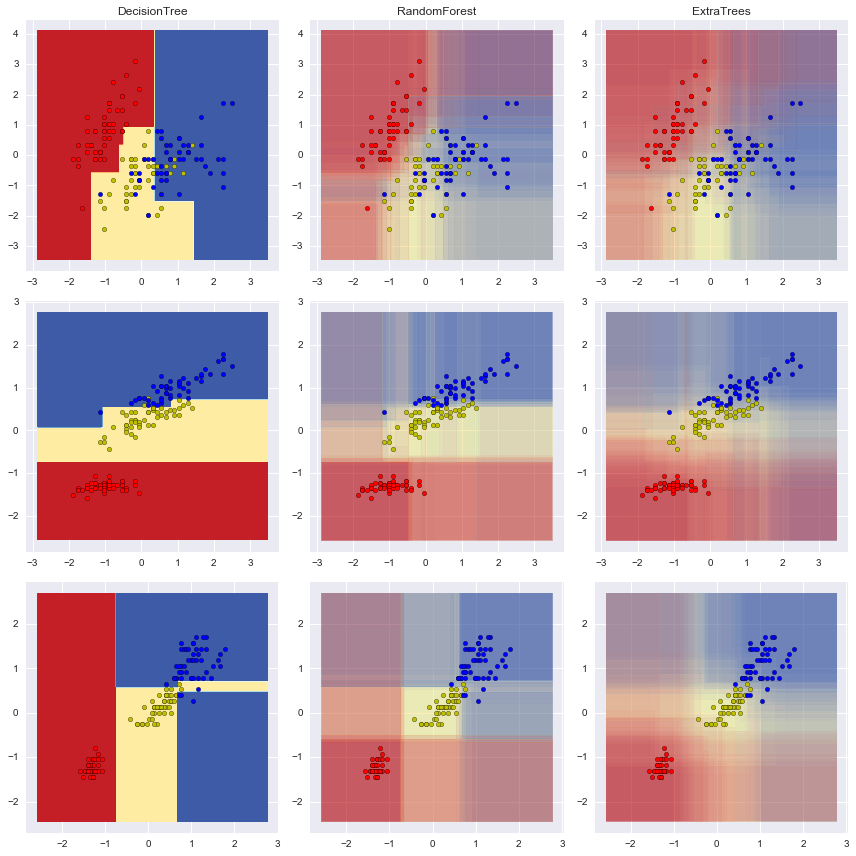

In [7]:
iris = load_iris()

n_classes = 3
n_estimators = 30
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  
RANDOM_SEED = 13

models = [DecisionTreeClassifier(max_depth=4),
          RandomForestClassifier(max_depth=4, n_estimators=n_estimators),
          ExtraTreesClassifier(max_depth=4, n_estimators=n_estimators)]

plot_idx = 1
plt.figure(figsize=(12, 12))
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        clf = clone(model)
        clf = model.fit(X, y)
        
        plt.subplot(3, 3, plot_idx)
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        if plot_idx <= len(models):
            plt.title(model_title)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=cmap)

        plot_idx += 1

plt.tight_layout()
plt.show()

랜덤 포레스트의 장점 중 하나는 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점이다.

포레스트 안에서 사용된 모든 노드에 대해 어떤 독립 변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로 각각의 독립 변수들이 얻어낸 information gain의 평균을 비교하면 어떤 독립 변수가 중요한지를 비교할 수 있다.

각 독립변수의 중요도를 계산한다는 큰 장점
노드 갈라지는 순간 IG이 생긴다. 많이 줄어들 때 잘된 것. 노드를 다 모아서 x1인 것만 모아 IG의 총합을 구해 얼만큼 기여하는 지 통계적으로 나와 누가 중요한 지 알 수 있다. 디시전트리는 노드가 1개라서 별로 효과가 없지만 랜덤포레스트의 경우에는 이게 유용하게 쓰일 수 있다.

* 피처 선택하는 방법
* 싱글코에피션트t검정, anova, 피처importance, lasso

In [29]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

Feature ranking:
1. feature 0 (0.250402)
2. feature 1 (0.231094)
3. feature 2 (0.148057)
4. feature 3 (0.055632)
5. feature 5 (0.054583)
6. feature 8 (0.054573)
7. feature 6 (0.052606)
8. feature 7 (0.051109)
9. feature 9 (0.051010)
10. feature 4 (0.050934)


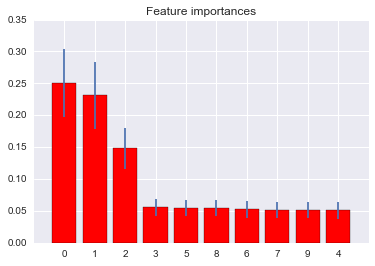

In [30]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [31]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

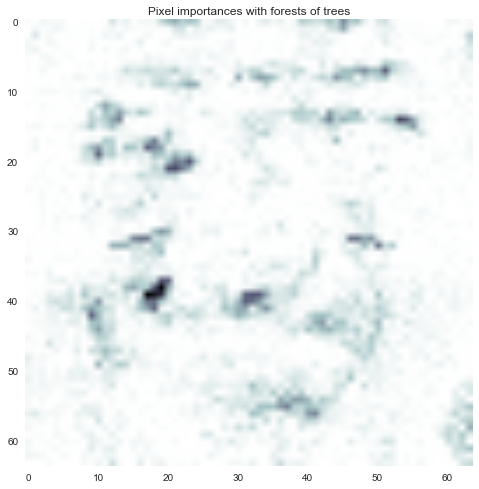

In [32]:
data = fetch_olivetti_faces()
X = data.images.reshape((len(data.images), -1))
y = data.target

mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]

forest = ExtraTreesClassifier(n_estimators=1000, max_features=128, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("Pixel importances with forests of trees")
plt.show()

### 예: 이미지 완성

In [33]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

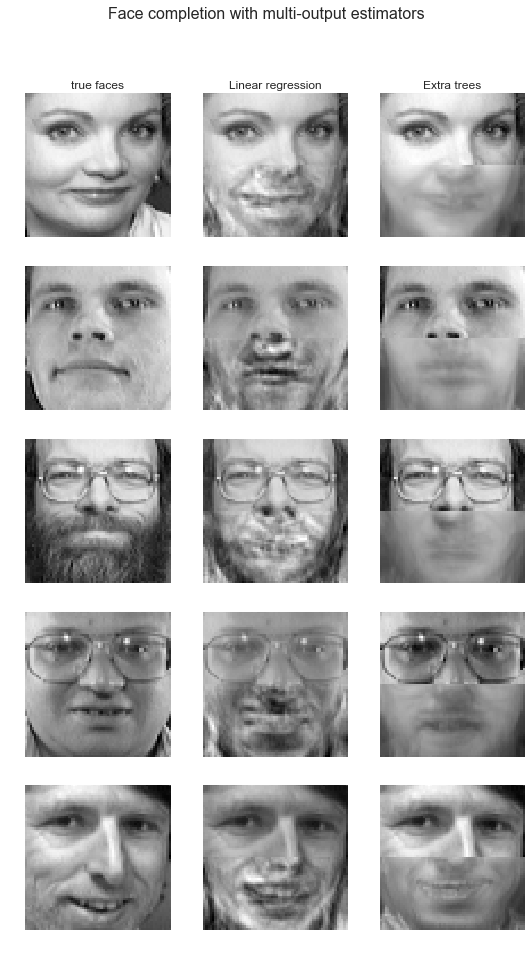

In [35]:
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]

n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = train[:, :int(np.ceil(0.5 * n_pixels))]  # Upper half of the faces
y_train = train[:, int(np.floor(0.5 * n_pixels)):]  # Lower half of the faces
X_test = test[:, :int(np.ceil(0.5 * n_pixels))]
y_test = test[:, int(np.floor(0.5 * n_pixels)):]

ESTIMATORS = {
    "Linear regression": LinearRegression(),
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(3*n_cols, 3*n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

    for j, est in enumerate(ESTIMATORS):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest");

## 에이다 부스트

에이다 부스트와 같은 부스트(boost) 방법은 미리 정해진 모형 집합을 사용하는 것이 아니라 단계적으로 모형 집합에 포함할 개별 모형을 선택한다. 부스트 방법에서 성능이 떨어지는 개별 모형을 weak classifier라고 한다.

또한 다수결 방법을 사용하지 않고 각 weak classifier $k$개에 대한 가중치를 주고 선형 결합하여 최종 모형인 boosted classifier $C$를 생성한다.



$$ C_{(m-1)}(x_i) = \alpha_1k_1(x_i) + \cdots + \alpha_{m-1}k_{m-1}(x_i) $$


$$ C_{m}(x_i) = C_{(m-1)}(x_i) + \alpha_m k_m(x_i) $$


* $k_m$ 선택 방법
 * 가중치 오차가 가장 적은 $k_m$
$$ E = \sum_{y_i \neq k_m(x_i)} w_i^{(m)} = \sum_{y_i \neq k_m(x_i)} e^{-y_i C_{m-1}(x_i)}$$ 

* $\alpha_m$ 결정 방법

$$ \epsilon_m = \dfrac{\sum_{y_i \neq k_m(x_i)} w_i^{(m)} }{ \sum_{i=1}^N w_i^{(m)}} $$

$$ \alpha_m = \frac{1}{2}\ln\left( \frac{1 - \epsilon_m}{\epsilon_m}\right) $$ 


* 속도 조절을 위해 learning rate $\nu$를 추가

$$ C_{m}(x_i) = C_{(m-1)}(x_i) + \nu\alpha_m k_m(x_i) $$

에이다 부스트 클래스는 `AdaBoostClassifier` 이다. 

* 부스팅의 문제점은 투표권에 대해서 변하지 않는다. 새로운 멤버를 뽑았을 때 투표권을 다 주는 것이 아니라 조금만 준다. leaning rate를 크게 주면 투표권을 많이 준다는 의미(X). 하지만 적게 주면 멤버를 많이 뽑는 것이기 때문에 robust해진다.
* 에이다 부스트의 장점은 새로 들어오는 친구가 반드시 성적이 좋을 필요가 없다. 0.5만 되도 된다.
* shallow learning은 다 끝났다. 1개 남았는데 튜닝이 남았다. 앙상블은 튜닝 안 한 대신에 개별적인 것을 모은 것. 튜닝은 커널의 감마값, C값 얼만큼 주는 것이 좋은가? 방법은 다 해보는 방법. 다 하는 방법은 grid search라는 명령어로 알아서 다 돌려주는 게 있다.

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

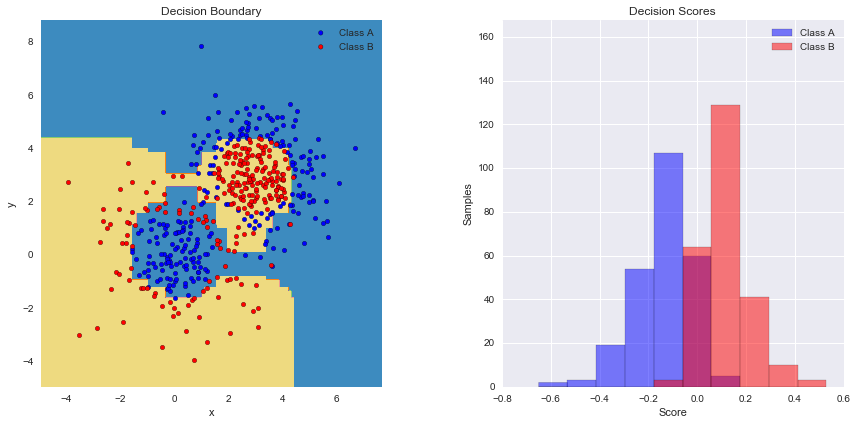

In [37]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(12,6))

plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()